i: 0 cost: 681.9344795114648 error: 0.407
i: 20 cost: 677.6638380265013 error: 0.405
i: 40 cost: 674.1164746889783 error: 0.405
i: 60 cost: 671.1653832933969 error: 0.404
i: 80 cost: 668.3336370612777 error: 0.389
i: 100 cost: 665.3153228468635 error: 0.379
i: 120 cost: 662.6446663136984 error: 0.379
i: 140 cost: 660.3631178433683 error: 0.373
i: 160 cost: 658.30734072418 error: 0.382
i: 180 cost: 656.4082852247178 error: 0.389
i: 200 cost: 654.7092046970852 error: 0.384
i: 220 cost: 653.0993964753175 error: 0.383
i: 240 cost: 651.5844258971209 error: 0.382
i: 260 cost: 650.1089361259726 error: 0.382
i: 280 cost: 648.6904568038029 error: 0.381
i: 300 cost: 647.3349659710416 error: 0.38
i: 320 cost: 646.0183882463061 error: 0.378
i: 340 cost: 644.7661220190946 error: 0.375
i: 360 cost: 643.5662640410587 error: 0.372
i: 380 cost: 642.3807406703025 error: 0.369
i: 400 cost: 641.2239212572049 error: 0.369
i: 420 cost: 640.1043512123078 error: 0.365
i: 440 cost: 638.9941037206241 error: 0.3

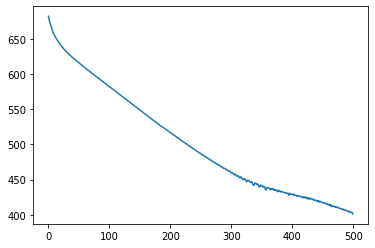

In [1]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/DS:Deep Learning in Python/facial expression recognition')

from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from util import getBinaryData, sigmoid, sigmoid_cost, error_rate, relu

class ANN(object):
    def __init__(self,M):
        self.M = M

    def fit(self, X, Y, learning_rate=5e-7, reg=1.0, epochs = 10000, show_fig=False):
        X, Y = shuffle(X,Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        self.W1 = np.random.randn(D, self.M)/np.sqrt(D)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M)/np.sqrt(self.M)
        self.b2 = 0

        costs = []
        best_validation_error = 1
        for i in range(epochs):
            #forward pass, cost calculation
            pY, Z = self.forward(X)

            #gradient descent step
            pY_Y = pY - Y
            self.W2 -= learning_rate*(Z.T.dot(pY_Y) + reg*self.W2)
            self.b2 -= learning_rate*((pY_Y).sum() + reg*self.b2)

            dZ = np.outer(pY_Y, self.W2) * (Z > 0)
            self.W1 -= learning_rate*(X.T.dot(dZ) + reg*self.W1)
            self.b1 -= learning_rate*(np.sum(dZ, axis=0) + reg*self.b1)

            if i % 20 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.round(pYvalid))
                print("i:",i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best validation error: ", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()

    def forward(self, X):
        Z = relu(X.dot(self.W1) + self.b1)
        return sigmoid(Z.dot(self.W2) + self.b2), Z

    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1- error_rate(Y, prediction)


def main():
    X, Y = getBinaryData()
    
    X0 = X[Y==0, :]
    X1 = X[Y==1, :]
    X1 = np.repeat(X1, 9, axis=0) 
    X = np.vstack([X0,X1])
    Y = np.array([0]*len(X0) + [1]*len(X1))

    model = ANN(100)
    model.fit(X, Y, show_fig=True)

if __name__ == '__main__':
    main()



